In [1]:
import  tensorflow as tf

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

## Labeling the images by using image_dataset_from_directory from keras.utils package

In [4]:
path='/train'

data=tf.keras.utils.image_dataset_from_directory(path)


Found 4030 files belonging to 2 classes.


### Converting data into numpy iterator where the data in the form of batches each bach contains 32 images with shape of (256,256,3) with labels as opened or closed(Binary values) and suffles the dataset

In [5]:
batch=data.as_numpy_iterator().next()
print(len(batch))
print(batch[0].shape)
print(batch[1].shape)

2
(32, 256, 256, 3)
(32,)


In [6]:
batch[0],batch[1]

(array([[[[ 65.      ,  65.      ,  65.      ],
          [ 65.      ,  65.      ,  65.      ],
          [ 65.      ,  65.      ,  65.      ],
          ...,
          [114.71875 , 114.71875 , 114.71875 ],
          [115.      , 115.      , 115.      ],
          [115.      , 115.      , 115.      ]],
 
         [[ 65.      ,  65.      ,  65.      ],
          [ 65.      ,  65.      ,  65.      ],
          [ 65.      ,  65.      ,  65.      ],
          ...,
          [114.71875 , 114.71875 , 114.71875 ],
          [115.      , 115.      , 115.      ],
          [115.      , 115.      , 115.      ]],
 
         [[ 64.71875 ,  64.71875 ,  64.71875 ],
          [ 64.71875 ,  64.71875 ,  64.71875 ],
          [ 64.79785 ,  64.79785 ,  64.79785 ],
          ...,
          [114.5166  , 114.5166  , 114.5166  ],
          [114.71875 , 114.71875 , 114.71875 ],
          [114.71875 , 114.71875 , 114.71875 ]],
 
         ...,
 
         [[ 77.71875 ,  77.71875 ,  77.71875 ],
          [ 77.718

In [7]:
batch[0].max()

255.0

## Scaling the image values to  0 to 1

In [8]:
data=data.map(lambda x,y: (x/255,y))

In [9]:
batch=data.as_numpy_iterator().next()
batch[0].max()

1.0

In [10]:
import matplotlib.pyplot as plt



*  Closed eyes labeled as : 0
*   Opended eyes : 1



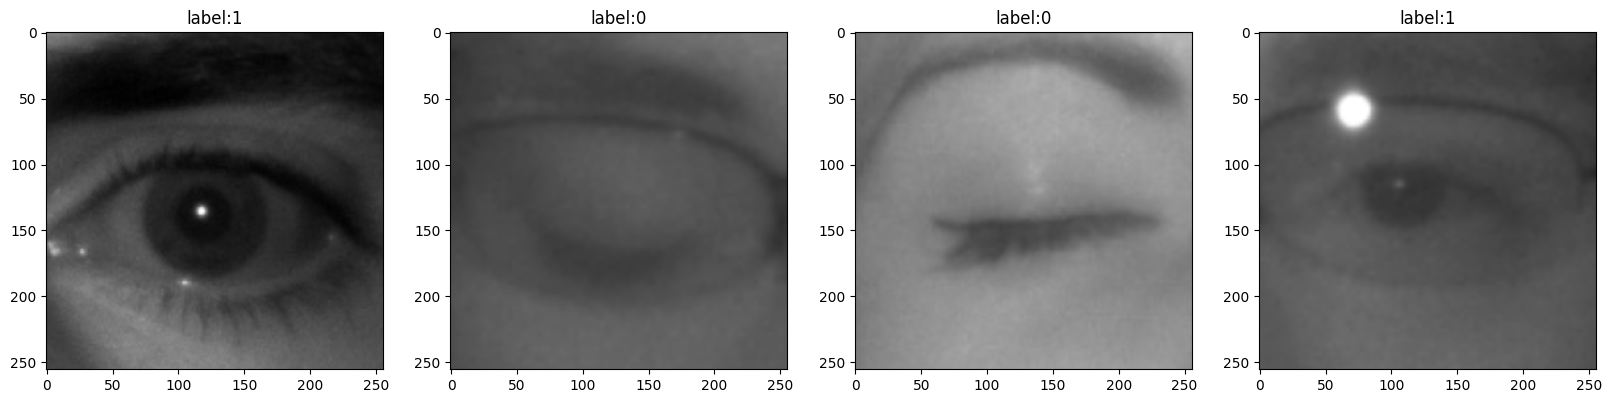

In [11]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text('label:{}'.format(batch[1][idx]))

## Splitting data into training,valditation and testing data

In [12]:
len(data)

126



1.   70% training data
2.   20% validation data
3.   10% testing data




In [13]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [14]:
train_size+val_size+test_size==len(data)

True

In [15]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# Importing model libraries

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [17]:
model=Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [18]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Adding a logs directory for tracking model triaing process

In [20]:
logdir='/logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

## Traing the model with train data with 10 epochs

In [21]:
hist=model.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/10
88/88 [==============================] - 308s 3s/step - loss: 0.2654 - accuracy: 0.8786 - val_loss: 0.0825 - val_accuracy: 0.9712
Epoch 2/10
88/88 [==============================] - 215s 2s/step - loss: 0.0844 - accuracy: 0.9734 - val_loss: 0.0513 - val_accuracy: 0.9862
Epoch 3/10
88/88 [==============================] - 201s 2s/step - loss: 0.0601 - accuracy: 0.9790 - val_loss: 0.0514 - val_accuracy: 0.9862
Epoch 4/10
88/88 [==============================] - 204s 2s/step - loss: 0.0465 - accuracy: 0.9869 - val_loss: 0.0252 - val_accuracy: 0.9950
Epoch 5/10
88/88 [==============================] - 211s 2s/step - loss: 0.0263 - accuracy: 0.9940 - val_loss: 0.0179 - val_accuracy: 0.9950
Epoch 6/10
88/88 [==============================] - 205s 2s/step - loss: 0.0192 - accuracy: 0.9943 - val_loss: 0.0079 - val_accuracy: 0.9987
Epoch 7/10
88/88 [==============================] - 205s 2s/step - loss: 0.0115 - accuracy: 0.9954 - val_loss: 0.0095 - val_accuracy: 0.9975
Epoch 8/10
88

# Plotting accuracy and loss

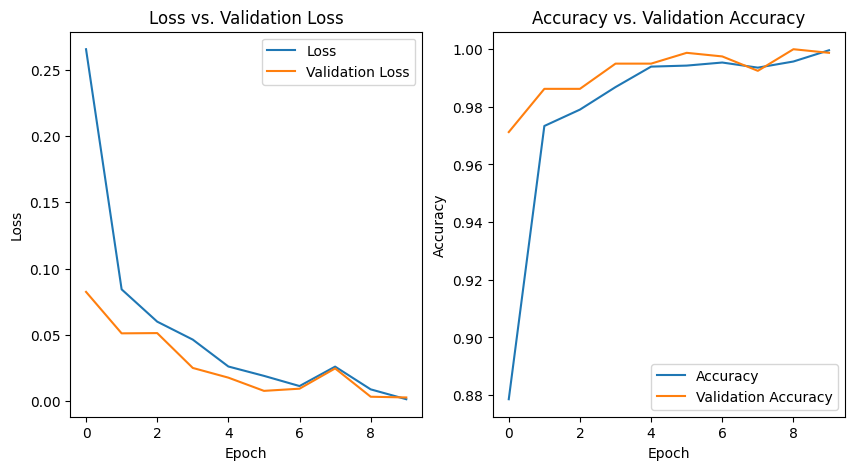

In [22]:

import matplotlib.pyplot as plt

loss = hist.history['loss']
val_loss = hist.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(loss, label='Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Loss vs. Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(hist.history['accuracy'], label='Accuracy')
ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy vs. Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()


## Precision , Recall and Accuracy for test data

In [23]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [24]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [25]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 1s 539ms/step


In [26]:
print('precision',pre.result().numpy())
print('recall',re.result().numpy())
print('accuracy',acc.result().numpy())

precision 1.0
recall 1.0
accuracy 1.0


In [27]:
import numpy as np

# Predictions for test batch first 4 images

1/1 [==============================] - 1s 826ms/step


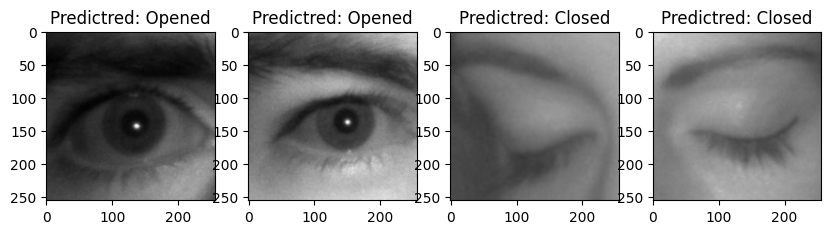

In [31]:
for batch in test.take(1):
  X,y=batch
  yhat=model.predict(X)

  yhat=np.array(list(map(round,yhat.flatten())))
  fig,ax=plt.subplots(1,4,figsize=(10,5))

  for idx in range(4):

    ax[idx].imshow(X[idx])
    ax[idx].set_title('Predictred: {}'.format('Opened' if yhat[idx] else 'Closed'))



  plt.show()
